# <Center> Enigma Machine Learning Code Fest - Model Development</Center>

In [316]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/UpX-Academy/Hackathon/Enigma/Dataset/')
import warnings
warnings.filterwarnings("ignore")

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#PCA
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [318]:
train_dataset = pd.read_csv ('train_EDA.csv')
test_dataset = pd.read_csv ('test_EDA.csv')
train_dataset.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Total_Answers_by_User,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,52664,0,3942,2,155623,7855,42,0.0,1891.02,1.04,0.23,0.52,0.48
1,327662,0,26046,12,21781,55801,1175,12.0,13433.57,7.41,1.64,3.46,2.89
2,468453,1,1358,4,56177,8067,60,0.0,1942.06,1.07,0.24,0.18,0.96
3,96996,0,264,3,168793,27064,9,0.0,6515.41,3.60,0.79,0.04,0.72
4,131465,1,4271,4,112223,13986,83,0.0,3367.00,1.86,0.41,0.57,0.96


In [319]:
train_dataset.info()
train_dataset[train_dataset.columns[train_dataset.isnull().any()]].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
ID                       299 non-null int64
Tag                      299 non-null int64
Reputation               299 non-null int64
Answers                  299 non-null int64
Username                 299 non-null int64
Views                    299 non-null int64
Upvotes                  299 non-null int64
Total_Answers_by_User    299 non-null float64
Views_per_Answer         299 non-null float64
Views_per_Reputation     299 non-null float64
Views_Scale              299 non-null float64
Reputation_Scale         299 non-null float64
Answers_Scale            299 non-null float64
dtypes: float64(6), int64(7)
memory usage: 30.4 KB


Series([], dtype: float64)

## Normalize the dataframe

In [320]:
from sklearn import preprocessing
train_dataset_normalized = train_dataset.drop(['ID','Username', 'Upvotes'], axis=1)
train_dataset_normalized = pd.DataFrame(preprocessing.scale(train_dataset_normalized), \
                                        columns = train_dataset_normalized.columns)

# Normalize the test dataset also
test_dataset_normalized = test_dataset.drop(['ID','Username'], axis=1)
test_dataset_normalized = pd.DataFrame(preprocessing.scale(test_dataset_normalized), \
                                        columns = test_dataset_normalized.columns)
train_dataset_normalized.head()

,Tag,Reputation,Answers,Views,Total_Answers_by_User,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,-1.316004,-0.158982,-0.524248,-0.302833,-0.242558,-0.302833,-0.303161,-0.302865,-0.160349,-0.524201
1,-1.316004,0.821670,1.909761,0.250135,2.573945,0.250135,0.249717,0.251901,0.821311,1.910752
2,-0.920542,-0.273622,-0.037446,-0.300388,-0.242558,-0.300388,-0.300557,-0.298931,-0.273874,-0.039231
3,-1.316004,-0.322158,-0.280847,-0.081293,-0.242558,-0.081293,-0.080968,-0.082533,-0.320620,-0.281716
4,-0.920542,-0.144386,-0.037446,-0.232123,-0.242558,-0.232123,-0.231990,-0.232044,-0.143654,-0.039231


## Perform PCA analysis for Dimentionality Reduction

In [321]:
#Get the output variable in the label separately
label = train_dataset["Upvotes"].values
predictors = train_dataset_normalized.values

In [322]:
#Build the PCA model
pca = PCA(n_components = len(train_dataset_normalized.columns))
pca.fit_transform(predictors)
variance_ratio = pca.explained_variance_ratio_
display(variance_ratio)
display(pca.explained_variance_)

array([5.58376562e-01, 2.04073840e-01, 1.18632345e-01, 9.96060341e-02,
       1.93108404e-02, 2.42362661e-07, 9.07175103e-08, 4.14884477e-08,
       4.35097749e-09, 8.67059843e-16])

array([5.60250309e+00, 2.04758651e+00, 1.19030440e+00, 9.99402826e-01,
       1.93756419e-01, 2.43175958e-06, 9.10219315e-07, 4.16276707e-07,
       4.36557809e-08, 8.69969439e-15])

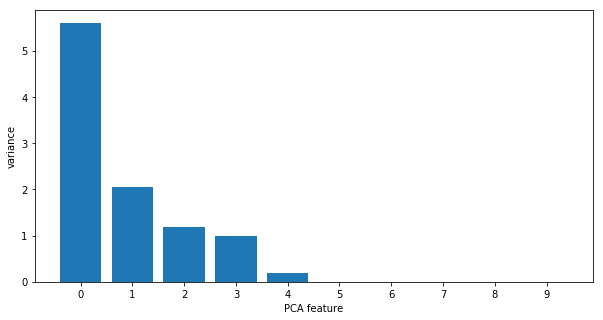

In [323]:
#Plot the Scree Plot
#scree plot
plt.figure(figsize=[10,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

array([ 55.84,  76.25,  88.11,  98.07, 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  ])

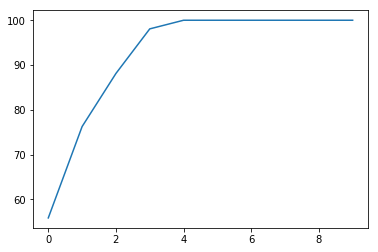

In [324]:
#Plot the cumulating sum of variance ratio
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
display(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [325]:
#Now build the model with chosen number of Principal Components
pca = PCA(n_components = 4)
pca.fit(predictors)
transformed_vector =pca.fit_transform(predictors)

In [326]:
# Dump the principal components relation with features
pd.DataFrame(pca.components_, columns = train_dataset_normalized.columns, index = ['PC-1', 'PC-2', 'PC-3', 'PC-4'])


,Tag,Reputation,Answers,Views,Total_Answers_by_User,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
PC-1,-0.002813,0.068196,0.353715,0.396223,0.335425,0.396223,0.396226,0.396219,0.068211,0.353686
PC-2,0.007976,0.672678,0.100351,-0.125583,0.108277,-0.125583,-0.125584,-0.125569,0.672683,0.100313
PC-3,-0.161152,0.204914,-0.453395,0.273928,-0.422852,0.273928,0.273914,0.273966,0.204864,-0.453366
PC-4,0.986196,0.027905,-0.088417,0.046836,-0.037656,0.046836,0.046818,0.046837,0.027840,-0.088625


In [327]:
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
display(variance_ratio_cum_sum)


array([55.84, 76.25, 88.11, 98.07])

Text(204,0.5,'Principal components')

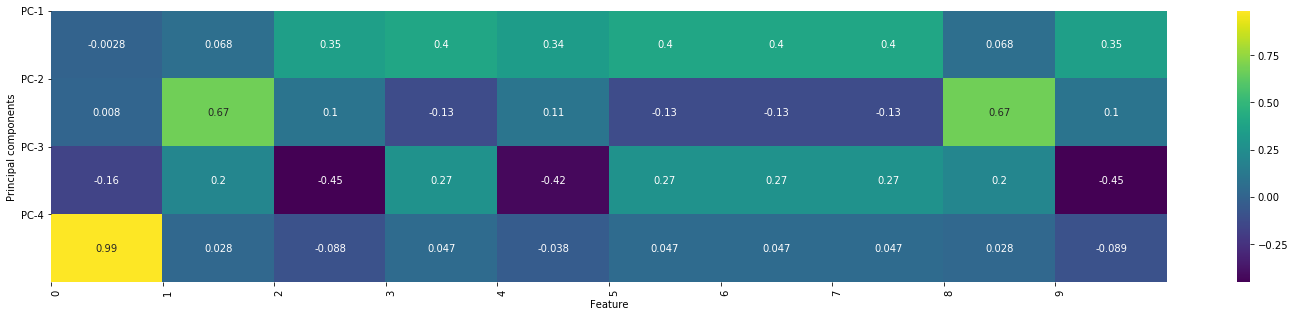

In [328]:
# Plot the heat map displaying compliance of principal components with input feature
plt.figure(figsize=[25,5])
sns.heatmap(pca.components_[0:4,:], annot = True, cmap = 'viridis')
plt.yticks([0,1,2,3], ["PC-1", "PC-2", "PC-3", "PC-4"], rotation = 360, ha = "right")
plt.xticks(range(len(features)), features, rotation=90, ha = "left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Compare the accuracy of the algorithms

In [329]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'mean_squared_error'

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [331]:
feature_cols = ['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', 'Views_per_Answer', 'Views_per_Reputation', \
                'Views_Scale', 'Reputation_Scale', 'Answers_Scale']
X = train_dataset_normalized [feature_cols]
y = train_dataset.Upvotes
X_train_ds, X_validate_ds, y_train, y_validate = train_test_split(X, y, test_size=0.33)
X_train = X_train_ds.values
X_validate = X_validate_ds.values

In [332]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -1772952.082312 (2835642.451764)
LDA: -4653244.490000 (6285271.602282)
KNN: -1459026.337000 (3155593.750113)
LASSO: -1697862.291279 (2806090.990012)
EN: -1537791.105407 (3295439.351129)
DecisionTree: -3581256.025000 (5206494.523806)
SVR: -2108767.133893 (4510568.106032)


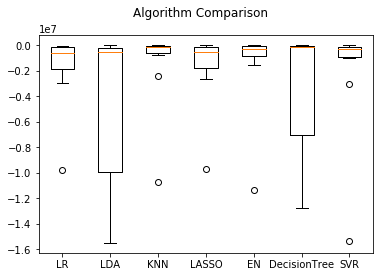

In [333]:
# boxplot algorithm comparison
fig = plt.figure()

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Inference
1. Linier Regression, KNN and Support Vector Regression seems to a better algorithm

## Build the Linier Regression Model

In [334]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

In [335]:
feature_cols = ['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', 'Views_per_Answer', 'Views_per_Reputation', \
                'Views_Scale', 'Reputation_Scale', 'Answers_Scale']
X = train_dataset_normalized [feature_cols]
y = label
X_train_ds, X_validate_ds, y_train, y_validate = train_test_split(X, y, test_size=0.33)

X_train = X_train_ds.values
X_validate = X_validate_ds.values

In [336]:
#Build the linier regression model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
# Display the intercept and coefficient
display (linreg.intercept_)
display (linreg.coef_)
list(zip(feature_cols, linreg.coef_))

339.9900368098602

array([ 9.42986288e+04,  7.12094516e+04,  8.44047872e+08,  5.37949561e+02,
       -8.44344722e+08,  3.19473987e+05, -2.18466395e+04, -9.38688660e+04,
       -7.12766652e+04])

[('Reputation', 94298.62876811576),
 ('Answers', 71209.45155084992),
 ('Views', 844047872.0904719),
 ('Total_Answers_by_User', 537.9495607870281),
 ('Views_per_Answer', -844344721.5176393),
 ('Views_per_Reputation', 319473.9873428247),
 ('Views_Scale', -21846.639502753173),
 ('Reputation_Scale', -93868.86603711214),
 ('Answers_Scale', -71276.66521031733)]

In [337]:
y_pred  = linreg.predict(X_validate)
y_pred

array([-1.02355570e+02,  4.60034823e+03, -2.91903092e+02,  8.76408452e+01,
        8.71013223e+02, -8.14488864e+02, -1.15440224e+02, -8.85626362e+01,
       -2.72892889e+02, -4.51455231e+02, -3.87539168e+02,  6.37191663e+01,
       -9.29663056e+01,  7.52723784e+02, -2.37312101e+02,  1.19325840e+04,
        3.72319537e+02, -8.47623068e+01,  1.31177131e+02, -5.47106655e+01,
       -1.01027542e+02, -2.82184906e+02, -2.46813649e+02, -3.76248297e+02,
        3.40418157e+02,  1.15909137e+03, -2.12778687e+02, -1.49405560e+02,
       -2.59433169e+02, -3.48180403e+02, -9.93885895e+01, -1.85841172e+02,
       -2.18524709e+01,  3.15434892e+02,  8.13048562e+00, -2.58402541e+02,
       -7.13850366e+02, -2.99009135e+00,  4.10169044e+02, -3.97745230e+02,
        2.27405814e+02,  2.32616354e+02, -7.40465876e+01, -3.49435422e+02,
       -2.67787426e+02,  1.15593036e+01, -8.51751645e+00, -2.12327735e+02,
       -1.75145308e+02,  6.30173313e+03,  2.77103309e+02,  9.32386847e+03,
        1.09568872e+02, -

In [338]:
rmse_value = np.sqrt(metrics.mean_squared_error(y_validate, y_pred))
rmse_value

1056.6403987773701

In [339]:
# Coefficient of determination or R squared value on training dataset
display(model.score(X_train,y_train))

0.36235137702669695

In [340]:
# Coefficient of determination or R squared value on test dataset
metrics.r2_score(y_validate,y_pred)

0.5675960907038038

In [270]:
pred_test = linreg.predict(test_dataset_normalized[['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', 'Views_per_Answer', 'Views_per_Reputation', \
                'Views_Scale', 'Reputation_Scale', 'Answers_Scale']])

In [271]:
# Output the Dataframe into a CSV file
test_dataset['Upvotes'] = pred_test
test_dataset[['ID', 'Upvotes']].to_csv('Submission_Anupam_LR.csv',  index = False)

## Build the K Nearest Neighbours Model

In [272]:
from sklearn.neighbors import KNeighborsRegressor

In [273]:
feature_cols = ['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', 'Views_per_Answer', 'Views_per_Reputation', \
                'Views_Scale', 'Reputation_Scale', 'Answers_Scale']
X = train_dataset_normalized [feature_cols]
y = label
X_train_ds, X_validate_ds, y_train, y_validate = train_test_split(X, y, test_size=0.33)

X_train = X_train_ds.values
X_validate = X_validate_ds.values

In [274]:
knn_reggression = KNeighborsRegressor(n_neighbors = 5)
knn_reggression = knn_reggression.fit(X_train, y_train)

In [275]:
y_pred = knn_reggression.predict(X_validate)
y_pred

array([1.3000e+01, 3.3200e+01, 4.7200e+01, 3.9400e+01, 1.8800e+01,
       1.3000e+01, 2.5800e+01, 3.0000e+00, 5.3400e+01, 2.0680e+02,
       5.3400e+01, 1.8800e+01, 7.4000e+00, 1.2400e+01, 6.8000e+00,
       3.5400e+01, 7.0000e+00, 7.4320e+02, 9.0000e+00, 1.7640e+02,
       3.1060e+02, 6.2000e+01, 9.2000e+00, 6.0600e+01, 6.4000e+00,
       5.0800e+01, 2.4900e+02, 5.0000e+01, 5.4200e+01, 7.6000e+00,
       7.4000e+00, 8.2000e+00, 1.9958e+03, 4.2814e+03, 4.7600e+01,
       4.0200e+01, 7.4000e+00, 5.0600e+01, 1.8200e+01, 4.1540e+02,
       1.6832e+03, 1.3800e+01, 1.9240e+03, 5.8000e+00, 7.0000e+00,
       1.3000e+01, 2.7800e+01, 3.2600e+01, 2.2600e+01, 2.4000e+01,
       7.8000e+00, 9.0000e+00, 2.7600e+01, 3.0000e+00, 2.0060e+02,
       2.9400e+01, 1.1520e+02, 5.6260e+02, 1.2400e+01, 7.0000e+00,
       1.6420e+02, 2.0080e+02, 7.0000e+00, 1.7400e+01, 3.1060e+02,
       7.7600e+01, 2.8600e+01, 3.1800e+01, 4.5200e+01, 5.1600e+01,
       1.4500e+02, 8.0000e+00, 1.3000e+01, 3.8000e+00, 6.2400e

In [276]:
rmse_value = np.sqrt(metrics.mean_squared_error(y_validate, y_pred))
rmse_value

1381.1883050986983

In [277]:
# Coefficient of determination or R squared value on training dataset
knn_reggression.score(X_train,y_train)


0.5398363093955235

In [278]:
# Coefficient of determination or R squared value on test dataset
metrics.r2_score(y_validate,y_pred)

0.4110172798008812

In [279]:
pred_test = knn_reggression.predict(test_dataset_normalized[['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', \
            'Views_per_Answer', 'Views_per_Reputation', 'Views_Scale', 'Reputation_Scale', 'Answers_Scale']])

In [280]:
# Output the Dataframe into a CSV file
test_dataset['Upvotes'] = pred_test
test_dataset[['ID', 'Upvotes']].to_csv('Submission_Anupam_KNN.csv',  index = False)

## Build the Random Forest Model

In [281]:
train_dataset_normalized.head()

,Tag,Reputation,Answers,Views,Total_Answers_by_User,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,-1.316004,-0.158982,-0.524248,-0.302833,-0.242558,-0.302833,-0.303161,-0.302865,-0.160349,-0.524201
1,-1.316004,0.821670,1.909761,0.250135,2.573945,0.250135,0.249717,0.251901,0.821311,1.910752
2,-0.920542,-0.273622,-0.037446,-0.300388,-0.242558,-0.300388,-0.300557,-0.298931,-0.273874,-0.039231
3,-1.316004,-0.322158,-0.280847,-0.081293,-0.242558,-0.081293,-0.080968,-0.082533,-0.320620,-0.281716
4,-0.920542,-0.144386,-0.037446,-0.232123,-0.242558,-0.232123,-0.231990,-0.232044,-0.143654,-0.039231


In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [283]:
feature_cols = ['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', 'Views_per_Answer', 'Views_per_Reputation', \
                'Views_Scale', 'Reputation_Scale', 'Answers_Scale']
X = train_dataset_normalized [feature_cols]
y = label
X_train_ds, X_validate_ds, y_train, y_validate = train_test_split(X, y, test_size=0.33)

X_train = X_train_ds.values
X_validate = X_validate_ds.values

In [284]:
model = tree.DecisionTreeRegressor(random_state = 123)
#model = model.fit(X_train, y_train)


In [285]:
# Tune the hyper parameter
params = {"max_depth": [3, 25], "min_samples_split": [5,50]}
from sklearn.grid_search import GridSearchCV
grid=GridSearchCV(model,params, cv = 5)
grid_model = grid.fit(X_train,y_train)
grid_model.best_params_


{'max_depth': 25, 'min_samples_split': 5}

In [286]:
grid_pred=grid_model.predict(X_validate)

In [287]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(grid_model.score(X_train, y_train))
print(grid_model.score(X_validate, y_validate))


0.9845081253900214
0.3613913265087011


In [288]:
list(zip(feature_cols, grid_model.feature_importances_))

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [289]:
#Check the decision tree
with open("Enigma.dot", 'w') as f:
    f = tree.export_graphviz(grid_model, out_file=f, feature_names = feature_cols)
# visit http://webgraphviz.com to visualize the tree


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [290]:
pred = grid_model.predict(X_validate)
pred_test = grid_model.predict(test_dataset_normalized[['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', \
            'Views_per_Answer', 'Views_per_Reputation', 'Views_Scale', 'Reputation_Scale', 'Answers_Scale']].values)
pred_test

array([  79.75      ,   94.75      ,   71.        ,   35.        ,
        871.33333333,   29.66666667,   54.        ,   81.        ,
        156.        ,   51.        ,   16.33333333,   71.        ,
          9.25      ,  381.        ,  224.75      ,  117.25      ,
         60.        ,   79.75      ,  871.33333333,    9.25      ,
         71.        ,   79.75      ,   54.        ,   51.        ,
         60.        ,   51.        ,   94.75      ,  803.5       ,
         16.33333333,    8.5       ,  141.        ,   51.        ,
         71.        ,  141.        ,    9.25      ,   71.        ,
          8.5       ,   38.        ,   71.        ,   29.66666667,
         73.66666667, 2281.5       ,    8.5       ,  156.        ,
         16.33333333,   79.75      ,   71.        , 2281.5       ,
         16.33333333,    9.25      ,  251.        ,  803.5       ,
         30.        ,   12.75      ,   19.5       ,   24.66666667,
        381.        ,  156.        ,  141.        ,   16.33333

In [291]:
test_dataset['Upvotes'] = pred_test

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

forest = RandomForestRegressor(n_estimators = 25, random_state = 100, verbose=1)
my_forest = forest.fit(X_train, y_train)
print(my_forest.score(X_train, y_train))

y_predict  = my_forest.predict(X_validate)
print(my_forest.score(X_validate, y_validate))
rmse = math.sqrt(mean_squared_error(y_validate, y_predict))
print('RMSE:' , rmse)

print(my_forest.feature_importances_)
list(zip(feature_cols, my_forest.feature_importances_))

0.8737205904092086
0.5226699886757504
RMSE: 1067.089218978716
[0.16179421 0.11040709 0.07137432 0.16872778 0.10171382 0.09950816
 0.09320559 0.09459237 0.09867664]


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


[('Reputation', 0.16179421273127617),
 ('Answers', 0.11040708898788867),
 ('Views', 0.07137432436891547),
 ('Total_Answers_by_User', 0.16872777929742022),
 ('Views_per_Answer', 0.10171382462868327),
 ('Views_per_Reputation', 0.09950816352983669),
 ('Views_Scale', 0.09320558965785172),
 ('Reputation_Scale', 0.09459237324720511),
 ('Answers_Scale', 0.09867664355092273)]

In [293]:
# Output the Dataframe into a CSV file
test_dataset[['ID', 'Upvotes']].to_csv('Submission_Anupam_RF.csv',  index = False)